**Flatiron Phase 3 Project - Syriatel Customer Churn**

****MODELING****

*Modeling Technique, Data Models & Models Evaluation*

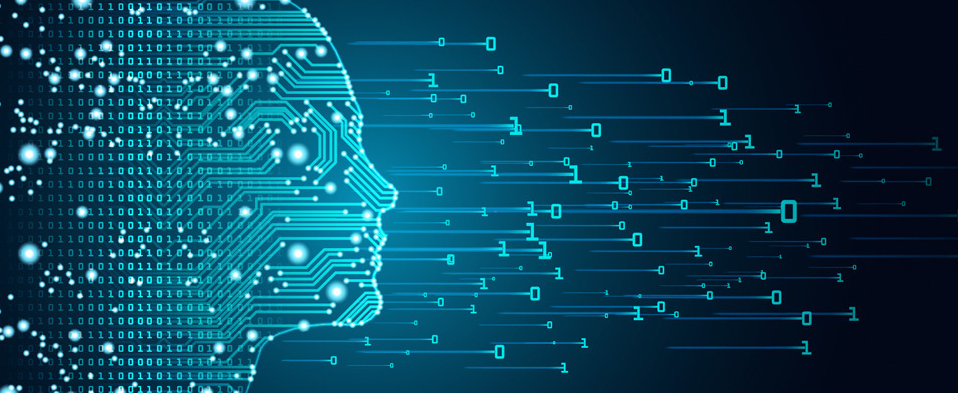

In [69]:
# Import image
from IPython.display import Image
# get image
Image("Images/Modeling.png", width=500, height=500)

***By Stamatios Choremis***

-------------------------

***Import necessary packages***

In [70]:
#import necessary packages and libraries
import seaborn as sns # Statistical data visualizations library
import pandas as pd # Data analysis library
import numpy as np #scientific computation library
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import statsmodels.api as sm

warnings.filterwarnings('ignore')

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Predictive Modeling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTENC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# Model Metrics
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn import tree


import warnings

***Data Source***

In this stage we are importing the clean data from folder Export_Data, file df1

***Import CVS Data***

In [71]:
#Location of Data at the Folder of the Hard Drive and at the github repository
df1 = pd.read_csv("Export_Data/df1.csv") #Importing the original dataframe and name it "df1"
df1.head(1)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,day_minutes,day_calls,day_charge,eve_minutes,...,intl_charge,customer_service_calls,churn,total_minutes_domestic,total_minutes_all,total_charge_domestic,total_charge_all,total_calls_domestic,total_calls_all,customer_satisfaction
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,2.7,1,0,707.2,717.2,72.86,75.56,300,303,0.330033


------------------

# Modeling Technique

## Set Dependent and Indepentent Variables

First we are **spliting the factors (X) from the target (y)**

In [72]:
y = df1['churn'] # Dependent Variable (Outcome to Churn)
X = df1.drop('churn', axis=1) # Independent Variables that affect Churn

## Split of data to train and test

Second, we are creating a **training and testing set**

In [73]:
# train 80% of the data and perform the test in 20% of them
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Split of data between categorical and continuous

Third, we are spliting the data between **categorical and continuous**

In [74]:
categorical = ['state','area_code', 'international_plan', 'voice_mail_plan']
df1_categorical = X_train[categorical]
df1_continuous = X_train.drop(categorical,axis = 1)

Splitting the numericals and categoricals **columns**

In [75]:
X_categorical = df1_categorical.columns
X_continuous = df1_continuous.columns

## Build a Machine Learning Pipeline

Then we are creating a **pipeline** to process the categorical and continuous variable.

We are using **standard scaler** and **one hot encoder** to convert **all values at the same scale**.

### Standard Scaler

**StandardScaler** removes the mean and scales each feature/variable to unit variance. 

In [76]:
continuous_to_transformer = Pipeline(steps=[('scaler', StandardScaler())])

### One-hot encoding

**One-hot encoding** is a process by which **categorical data are converted into numerical features** of a dataset. OneHotEncoder **creates a binary column for each category**.
This process is similar to Get_dummies that was used in Project 2.

In [77]:
categorical_to_transformer = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown='ignore',sparse=False))])

In [78]:
# drop='first' is a OneHotEncoder option that drops the first level of each category
# In this case does not provide any performance benefits

### Combine the Standard Scaled and One Hot Encoded columns

ColumnTransformer is also used to **combine the StandardScaled and OneHotEncoded columns together**

In [79]:
pipeline = ColumnTransformer(transformers=[('num', continuous_to_transformer, X_continuous),('cat', categorical_to_transformer, X_categorical)])

After combining the continuous and categorical columns, we need to create a **create a dataframe for train and test**

In [80]:
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
df_X_train = pd.DataFrame(X_train_scaled)
df_X_test = pd.DataFrame(X_test_scaled)
df_X_train.head(1)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,3.601382,-0.584936,-1.547653,-0.429657,-1.54717,-0.729987,-1.840891,-0.731087,1.255804,0.925634,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


The above table show us that the **columns names** are missing so we need to **recover them**

In [81]:
categorical_column_names = pipeline.transformers_[1][1].named_steps['ohe'].get_feature_names(X_categorical).tolist()
all_X_column_names= list(X_continuous) + categorical_column_names

After recovering them, we are **renaming** the train and test dataframes

In [82]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = all_X_column_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = all_X_column_names)

Then we **review and save** the new train and test dataframes

In [83]:
#review of dataframe
df_X_train = pd.DataFrame(X_train_scaled)
df_X_test = pd.DataFrame(X_test_scaled)

In [84]:
df_X_test.head(1)

,account_length,number_vmail_messages,day_minutes,day_calls,day_charge,eve_minutes,eve_calls,eve_charge,night_minutes,night_calls,...,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510,international_plan_0,international_plan_1,voice_mail_plan_0,voice_mail_plan_1
0,0.311486,-0.584936,-0.452712,-0.379362,-0.452767,2.56298,0.300651,2.562705,-0.21952,1.181501,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [85]:
#save dataframes
df_X_test.to_csv('Export_Data/df_X_test.csv', index=False) # save a copy to the hard drive of the Dataframe
df_X_train.to_csv('Export_Data/df_X_train.csv', index=False) # save a copy to the hard drive of the Dataframe

## Define standardize functions

### Model Metrics for Train Dataframe

Finally, we are bulding the model_performance **function** that will be used to present the **accuracy, log loss, recall, and precision** for the models.

In addition, we are including in model performance function (md) the **confusion matrix** to compare the **train with the test data**.

In [86]:
def model_metrics_train(model, 
                      y_train = y_train ,
                      X_train_scaled = X_train_scaled):
    
    pred_train = model.predict(X_train_scaled)
    
    print("Model Performance for Train Set")
    print(f'Accuracy: {round(accuracy_score(y_train, pred_train),3)}')
    print(f'Precision:{round(precision_score(y_train, pred_train),3)}')
    print(f'Recall:   {round(recall_score(y_train, pred_train),3)}')
    print(f'F1-Score: {round(f1_score(y_train, pred_train),3)}')
#    print(f'Log loss: {round(log_loss(y_train, pred_train),3)}')
    plot_confusion_matrix(model, X_train_scaled, y_train,cmap="Greens",display_labels=['not churned', 'churned'])

### Model Metrics for Test Dataframe

In [87]:
def model_metrics_test(model, 
                      y_test = y_test ,
                      X_test_scaled = X_test_scaled):
    
    pred_test = model.predict(X_test_scaled)
    
    print("Model Performance for Test Set")
    print(f'Accuracy: {round(accuracy_score(y_test, pred_test),3)}')
    print(f'Precision:{round(precision_score(y_test, pred_test),3)}')
    print(f'Recall:   {round(recall_score(y_test, pred_test),3)}')
    print(f'F1-Score: {round(f1_score(y_test, pred_test),3)}')
#    print(f'Log loss: {round(log_loss(y_test, pred_test),3)}')
    plot_confusion_matrix(model, X_test_scaled, y_test,cmap="Reds",display_labels=['not churn', 'churn'])

### ROC Curve

The ROC curve is created by **plotting the true positive rate (TPR) against the false positive rate (FPR)** at various threshold settings.

A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the **diagnostic ability of binary classifiers**.
* The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). 
* Classifiers that give curves closer to the top-left corner indicate a better performance.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

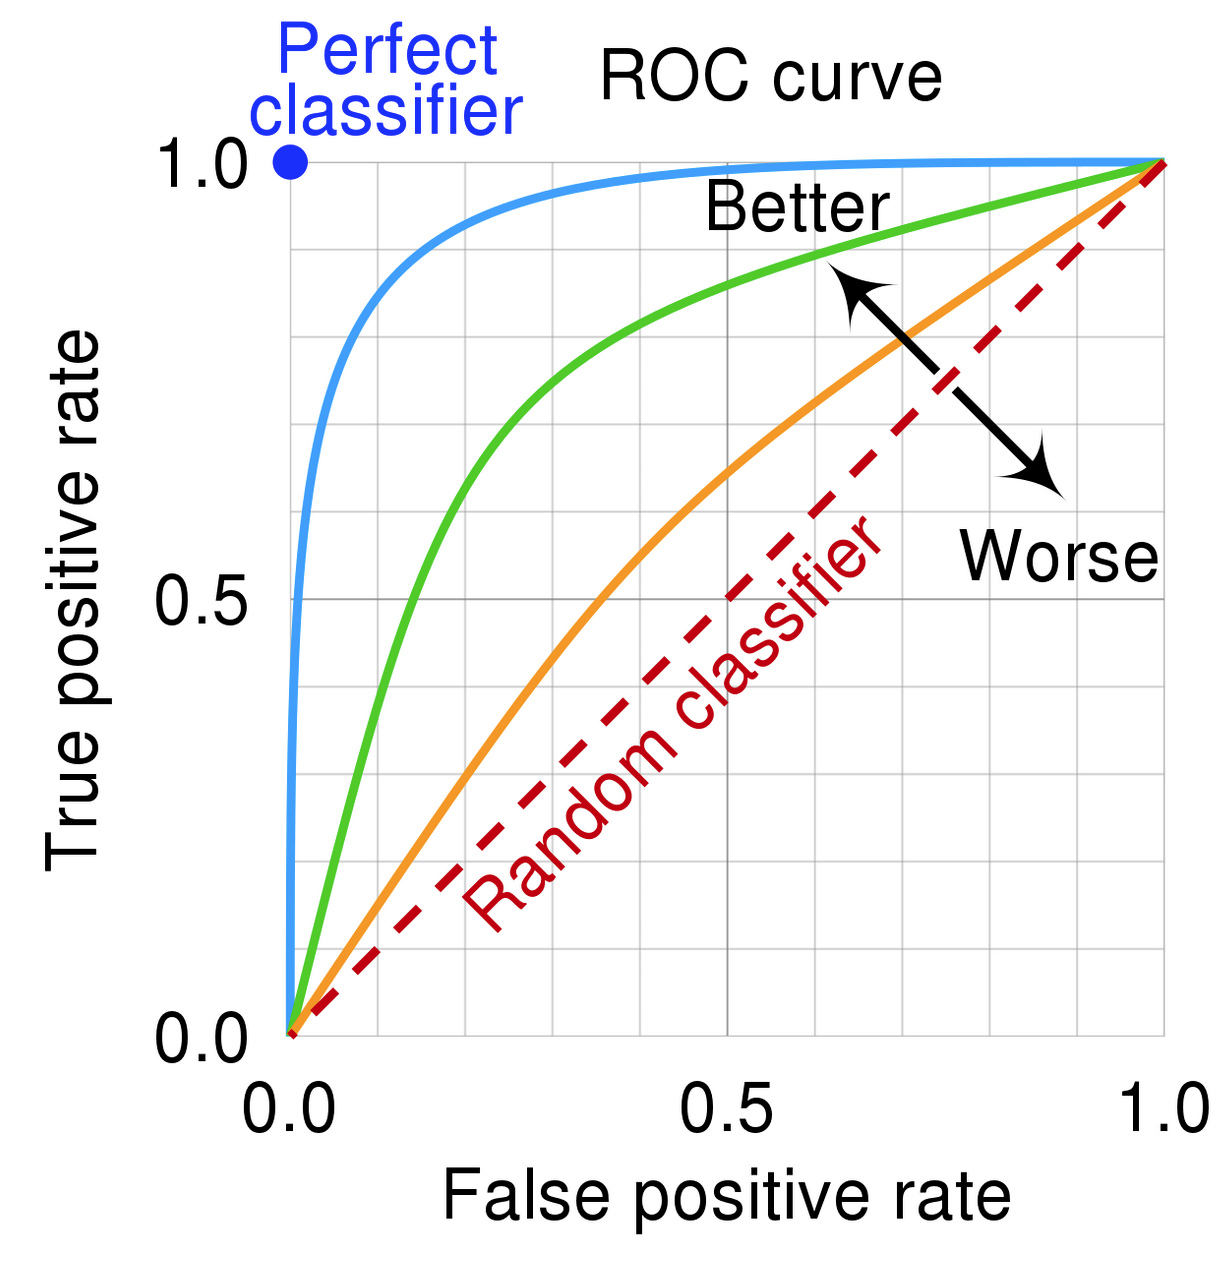

In [88]:
# get image
Image("Images/ROC_Curve_Theory.png", width=300, height=300)

**ROC_Curve with decision_function**

The former, decision_function, finds the distance to the separating hyperplane. 

In [89]:
def ROC_Curve_DF (model, 
           x_train, 
           x_test, 
           y_train, 
           y_test):
    y_test_score = model.decision_function(X_test_scaled)
    y_train_score = model.decision_function(X_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score)
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score)

    plt.figure(figsize = (5, 5))
    plt.plot(train_fpr, train_tpr, color = 'Green', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'Red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'Blue', linestyle ='--')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

**ROC Curve with predict_proba**

The latter, predict_proba is a method of a (soft) classifier outputting the probability of the instance being in each of the classes.

In [90]:
def ROC_Curve_PP (model, 
                   X_train, 
                   X_test, 
                   y_train, 
                   y_test):
    y_test_score = model.predict_proba(X_test_scaled)
    y_train_score = model.predict_proba(X_train_scaled)

    train_fpr, train_tpr, train_thresholds = metrics.roc_curve(y_train, y_train_score[:,1])
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve(y_test, y_test_score[:,1])

    plt.figure(figsize = (5, 5))
    plt.plot(train_fpr, train_tpr, color = 'Green', label = 'Train ROC curve')
    plt.plot(test_fpr, test_tpr, color = 'Red', label = 'Test ROC curve')
    plt.plot([0,1], [0,1], color = 'Blue', linestyle ='--')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

### Feature Importance

To evaluate the factors that drive our model we are using **Feature Importance**.
*  Feature Importance refers to techniques that calculate a score for all the input features for a given model. 
*  The scores represent the “importance” of each feature. 
*  A higher score means that the specific feature will have a larger effect on the model that is being used to predict our variable of Churn.

In [91]:
def Feature_Importance (model):
    features = X_train_scaled.shape[1]
    plt.figure(figsize=(10,20))
    plt.barh(range(features), model.feature_importances_, color = 'Blue', align='center') 
    plt.yticks(np.arange(features), X_train_scaled.columns.values) 
    plt.title('Factors that Drive the Model')
    plt.xlabel('Relative importance')
    plt.ylabel('Factors')

### Imbalanced Classification

The below graph shows that the number of observations per class are **disproportinately distributed**. Therefore, in some of our models, we are going to use SMOTENC and class_weight.

<AxesSubplot:>

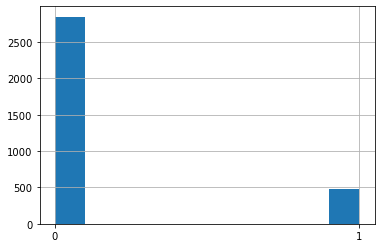

In [92]:
df1['churn'].astype(str).hist()

**SMOTE**

In some of our models, we are goin to use **SMOTE** and **SMOTENC**.
* SMOTE encountered in a classification problem in which the number of observations per class are disproportinately distributed
* We will use this technique to generate uniform distribution accross the classes
* It generates new observations within the estisting feature space over our minority classes to balance the distribution
* Unlike SMOTE, SMOTE-NC for dataset containing numerical and categorical features
* The performance of models is usually better when SMOTE is used


**Class weights**

Oversampling and undersampling methods essentially give more weight to particular classes
* SMOTE creates new observations of the minority class by randomly sampling from a set of "similar" minority class observations. 
* Class weights directly modify the loss function by giving more (or less) penalty to the classes with more (or less) weight. 

------------------

# Model Evaluation Metrics

The **metrics** that we are going to use to **evaluate the accurecy of our models** are the below:
* `Accuracy:`             Accuracy is the most intuitive performance measure. It is a ratio of correctly predicted observation to the total observations.
* `Precision:`            Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
* `Recall (Sensitivity):` Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
* `F1 score:`             F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. 

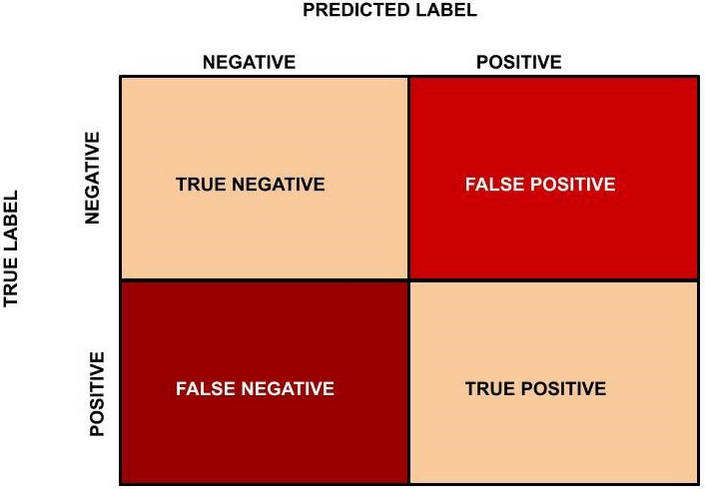

In [93]:
# get image
Image("Images/Model_Metrics_Theory2.png", width=300, height=300)

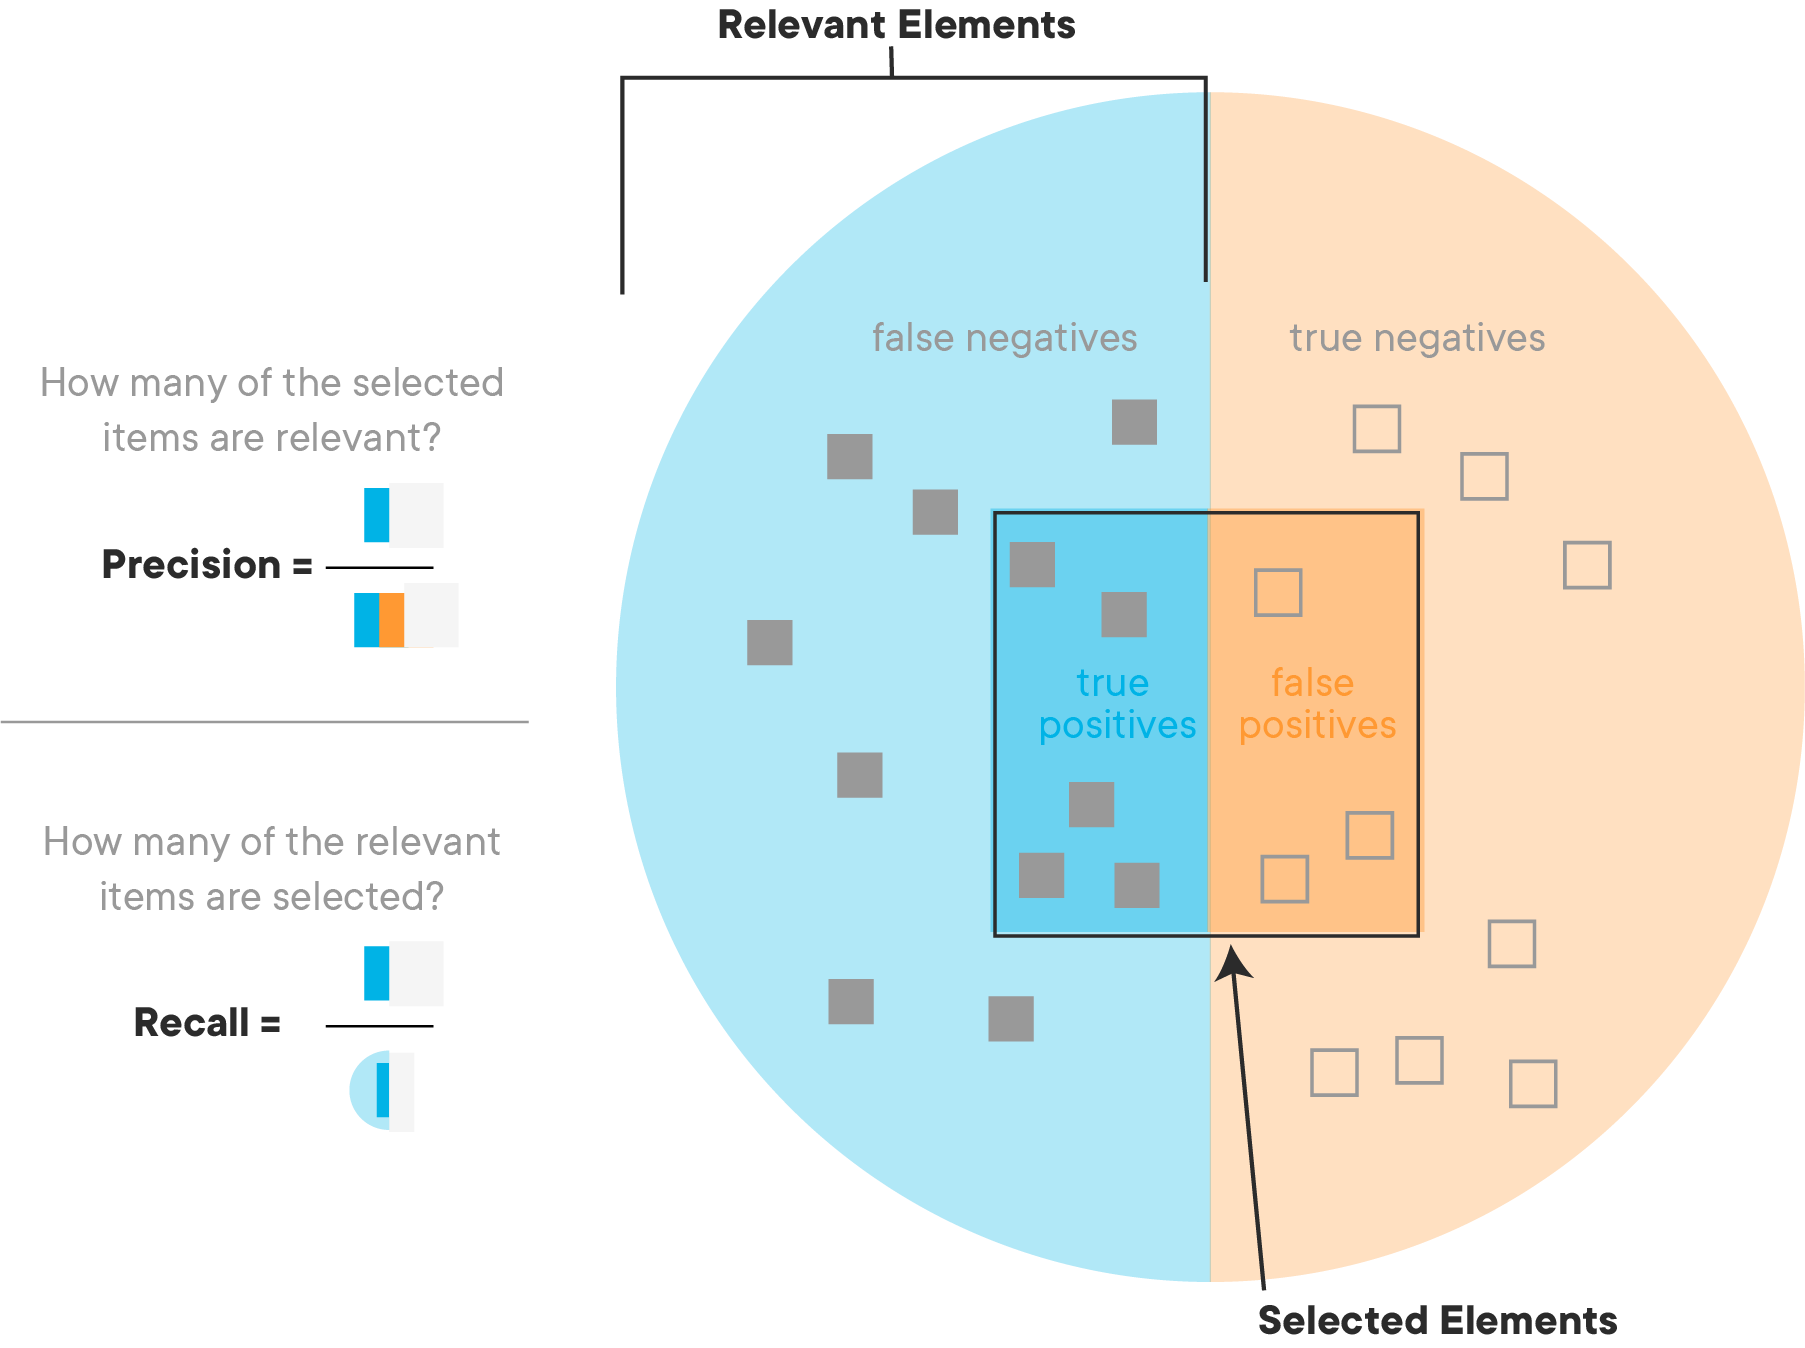

In [94]:
# get image
Image("Images/Model_Metrics_Theory.png", width=500, height=500)

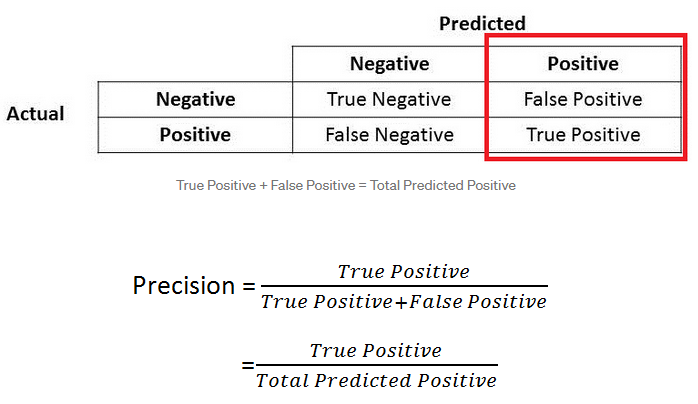

In [95]:
# get image
Image("Images/Precision.png", width=300, height=300)

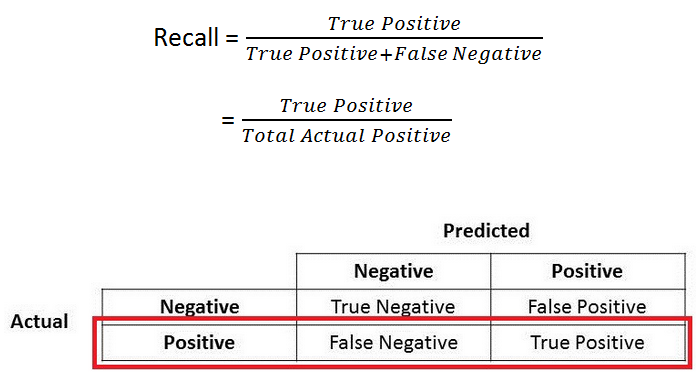

In [96]:
# get image
Image("Images/Recall.png", width=300, height=300)

**Recall as the most important metric**

The most important metric in our case is the **Recall**. This is because, it is **more important to accuretly predict the true positive values**. 
* If a customer is not going to churn and we predit that it will, the impact will not be significant. 
* However, if a customer is going to churn and we predict that will not, the impact for the business will be much higher

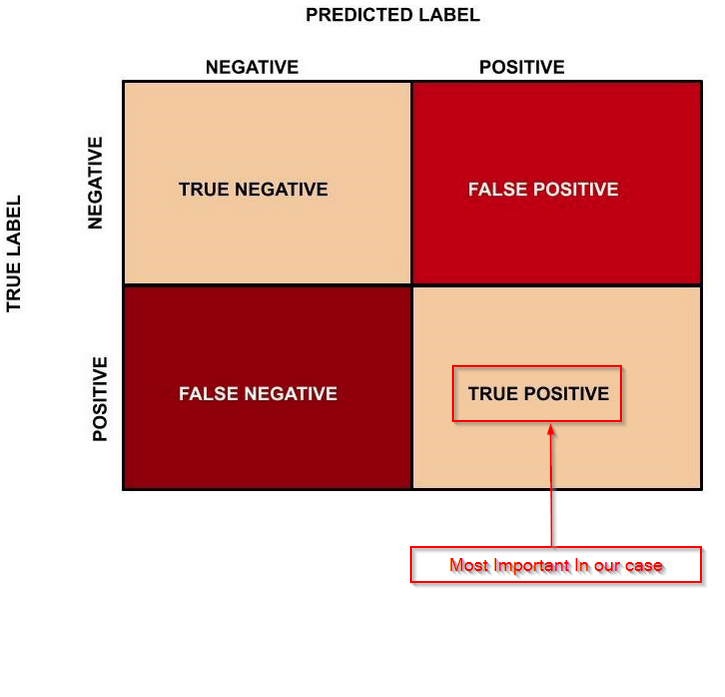

In [97]:
# get image
Image("Images/Model_Metrics_Theory3.png", width=300, height=300)

------------------

***Predictive Models***

# Model 0: Dummy Classifier

A dummy classifier is a type of classifier which **does not generate any insight about the data** and classifies the given data using only simple rules. 
The classifier’s behavior is completely independent of the training data as the trends in the training data are completely ignored and instead uses one of the strategies to predict the class label.

Below are a few strategies used by the dummy classifier to predict a class label:
* `Most Frequent:` The classifier always predicts the most frequent class label in the training data.
* `Stratified:` It generates predictions by respecting the class distribution of the training data. It is different from the “most frequent” strategy as it instead associates a probability with each data point of being the most frequent class label.
* `Uniform:` It generates predictions uniformly at random.
* `Constant:` The classifier always predicts a constant label and is primarily used when classifying non-majority class labels.

Model Performance for Train Set
Accuracy: 0.857
Precision:0.0
Recall:   0.0
F1-Score: 0.0


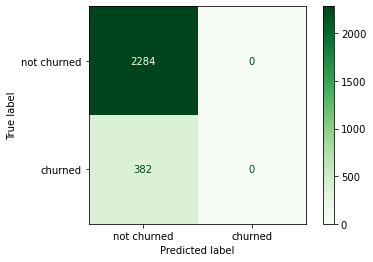

In [98]:
#We create a dummy model of our most frequent data
dummy_classifier_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_classifier_most_frequent.fit(X_train, y_train)

model_metrics_train(dummy_classifier_most_frequent);
#model_metrics_test(dummy_classifier_most_frequent);

------------------

# Model 1: Logistic Regression

Logistic regression estimates the probability of an event occurring, based on a given dataset of independent variables. 
* Since the outcome is a probability, the dependent variable is bounded between 0 and 1. 
* In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. 
* Logistic Regression is often used for classification and predictive analytics. 
* *www.ibm.com*


## Implementing Logistic Regression Model

**Prepare and Fit the Data**

In [99]:
# prepare the model
#LRmodel = LogisticRegression(random_state=42)
LRmodel = LogisticRegression(class_weight = 'balanced')


#fit the model on training data
LRmodel.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

**Training Dataset**

Model Performance for Train Set
Accuracy: 0.78
Precision:0.372
Recall:   0.775
F1-Score: 0.503


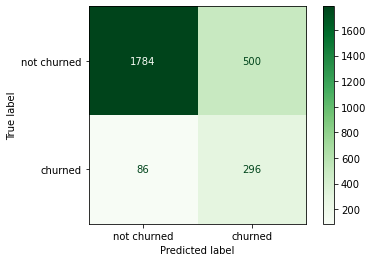

In [100]:
#evaluate the performance of the model for the train set
model_metrics_train(LRmodel)

**Test Dataset**

Model Performance for Test Set
Accuracy: 0.792
Precision:0.403
Recall:   0.782
F1-Score: 0.532


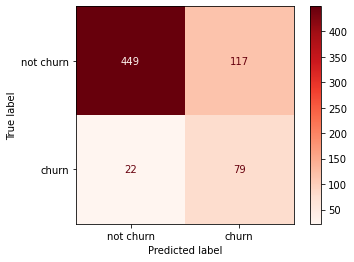

In [101]:
#evaluate the performance of the model for the test set
model_metrics_test(LRmodel)

## Evaluating Logistic Regression Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are very close
* `Accuracy of the Test model:`  High
* `Precision of the Test model:` Medium
* `Recall of the Test model:   ` Low
* `F1-Score of the Test model: ` Low

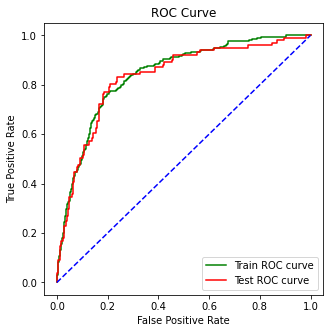

In [102]:
ROC_Curve_DF (LRmodel, X_train_scaled, X_test_scaled, y_train, y_test)

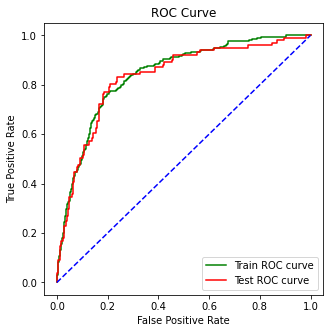

In [103]:
ROC_Curve_PP (LRmodel, X_train_scaled, X_test_scaled, y_train, y_test)

------------------

# Model 2: K-Nearest Neighbors without SMOTE

The k-nearest neighbors uses **proximity to make classifications or predictions** about the grouping of an individual data point
* The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier
* While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar **points can be found near one another**.

## Implementing K-Nearest Neighbors

**Prepare and Fit the Data**

In [104]:
# prepare the model
# create a pipeline without smote, and DecisionTreeClassifier
KNNmodel = imbpipeline(steps=[
#    ('smote', SMOTE()),
    ('model', KNeighborsClassifier()),
])

#fit the model on training data
KNNmodel.fit(X_train_scaled, y_train)

Pipeline(steps=[('model', KNeighborsClassifier())])

**Training Dataset**

Model Performance for Train Set
Accuracy: 0.921
Precision:0.938
Recall:   0.479
F1-Score: 0.634


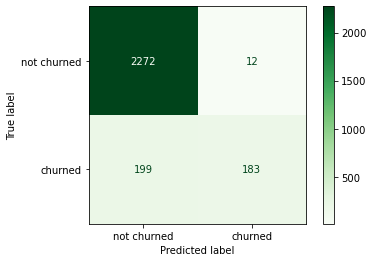

In [105]:
#evaluate the performance of the model for the train set
model_metrics_train(KNNmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.907
Precision:0.933
Recall:   0.416
F1-Score: 0.575


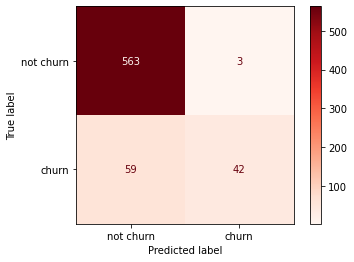

In [106]:
#evaluate the performance of the model for the test set
model_metrics_test(KNNmodel)

## Evaluating K-Nearest Neighbors Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are not close
* `Accuracy of the Test model:`  High
* `Precision of the Test model:` Low
* `Recall of the Test model:   ` Medium
* `F1-Score of the Test model: ` Low

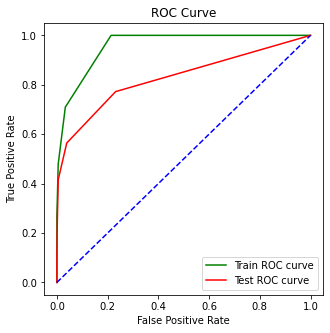

In [107]:
ROC_Curve_PP (KNNmodel, X_train_scaled, X_test_scaled, y_train, y_test)

------------------

# Model 2: K-Nearest Neighbors with SMOTENC

## Implementing K-Nearest Neighbors Model

**Prepare and Fit the Data**

In [108]:
# prepare the model
# create a pipeline with smoteNC, and DecisionTreeClassifier

categorical_column_range = range(23,80) #categorical columns start from column 23 (state_AK) and finish at column 80 (voice_mail_plan_1)
smote = SMOTENC(np.array(categorical_column_range),random_state=42, sampling_strategy=0.5)

KNNmodel = imbpipeline(steps=[
    ('sampling', smote),
    ('model', KNeighborsClassifier()),
])

#fit the model on training data
KNNmodel.fit(X_train_scaled, y_train)

Pipeline(steps=[('sampling',
                 SMOTENC(categorical_features=array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79]),
                         random_state=42, sampling_strategy=0.5)),
                ('model', KNeighborsClassifier())])

**Training Dataset**

Model Performance for Train Set
Accuracy: 0.903
Precision:0.605
Recall:   0.937
F1-Score: 0.735


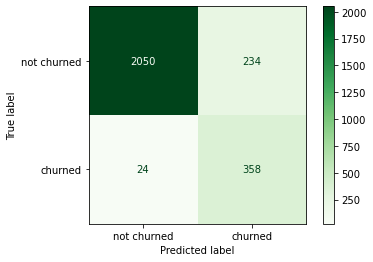

In [109]:
#evaluate the performance of the model for the train set
model_metrics_train(KNNmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.822
Precision:0.442
Recall:   0.673
F1-Score: 0.533


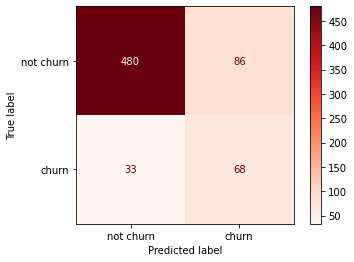

In [110]:
#evaluate the performance of the model for the test set
model_metrics_test(KNNmodel)

## Evaluating K-Nearest Neighbors Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are not close
* `Accuracy of the Test model:`  High
* `Precision of the Test model:` Low
* `Recall of the Test model:   ` Medium
* `F1-Score of the Test model: ` Low

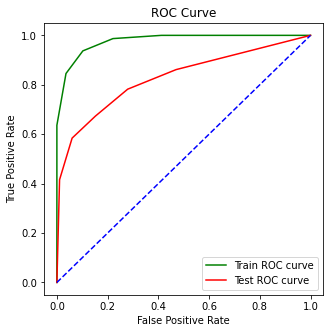

In [111]:
ROC_Curve_PP (KNNmodel, X_train_scaled, X_test_scaled, y_train, y_test)

------------------

# Model 3: Decision Tree without SMOTE

A decision tree is a type of supervised machine learning used to categorize or make predictions based on how a previous set of questions were answered. 
* It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
* It is used to solve regression and classification problems. 
* Decision tree is derived from the independent variables, with each node having a condition over a feature. The nodes decides which node to navigate next based on the condition. Once the leaf node is reached, an output is predicted.

## Implementing Decision Tree Model

**Prepare and Fit the Data**

In [112]:
# prepare the model
# create a pipeline with preprocessing, smote, and DecisionTreeClassifier
DTmodel = imbpipeline(steps=[
#    ('smote', SMOTE()),
    ('model', DecisionTreeClassifier(random_state=420)),])

#fit the model on training data
DTmodel.fit(X_train_scaled, y_train)

Pipeline(steps=[('model', DecisionTreeClassifier(random_state=420))])

**Training Dataset**

Model Performance for Train Set
Accuracy: 1.0
Precision:1.0
Recall:   1.0
F1-Score: 1.0


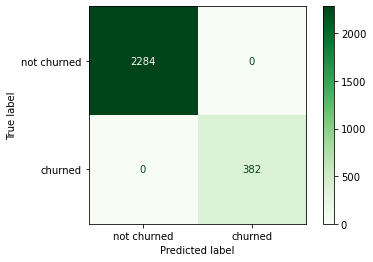

In [113]:
#evaluate the performance of the model for the train set
model_metrics_train(DTmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.949
Precision:0.807
Recall:   0.871
F1-Score: 0.838


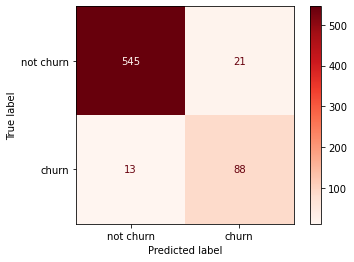

In [114]:
#evaluate the performance of the model for the test set
model_metrics_test(DTmodel)

## Evaluating Decision Tree Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are very close
* `Accuracy of the Test model:`  High
* `Precision of the Test model:` High
* `Recall of the Test model:   ` High
* `F1-Score of the Test model: ` High

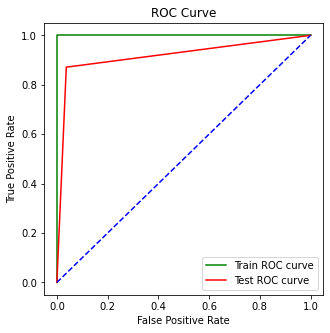

In [115]:
ROC_Curve_PP (DTmodel, X_train_scaled, X_test_scaled, y_train, y_test)

**Plot and export the Decision Tree Model**

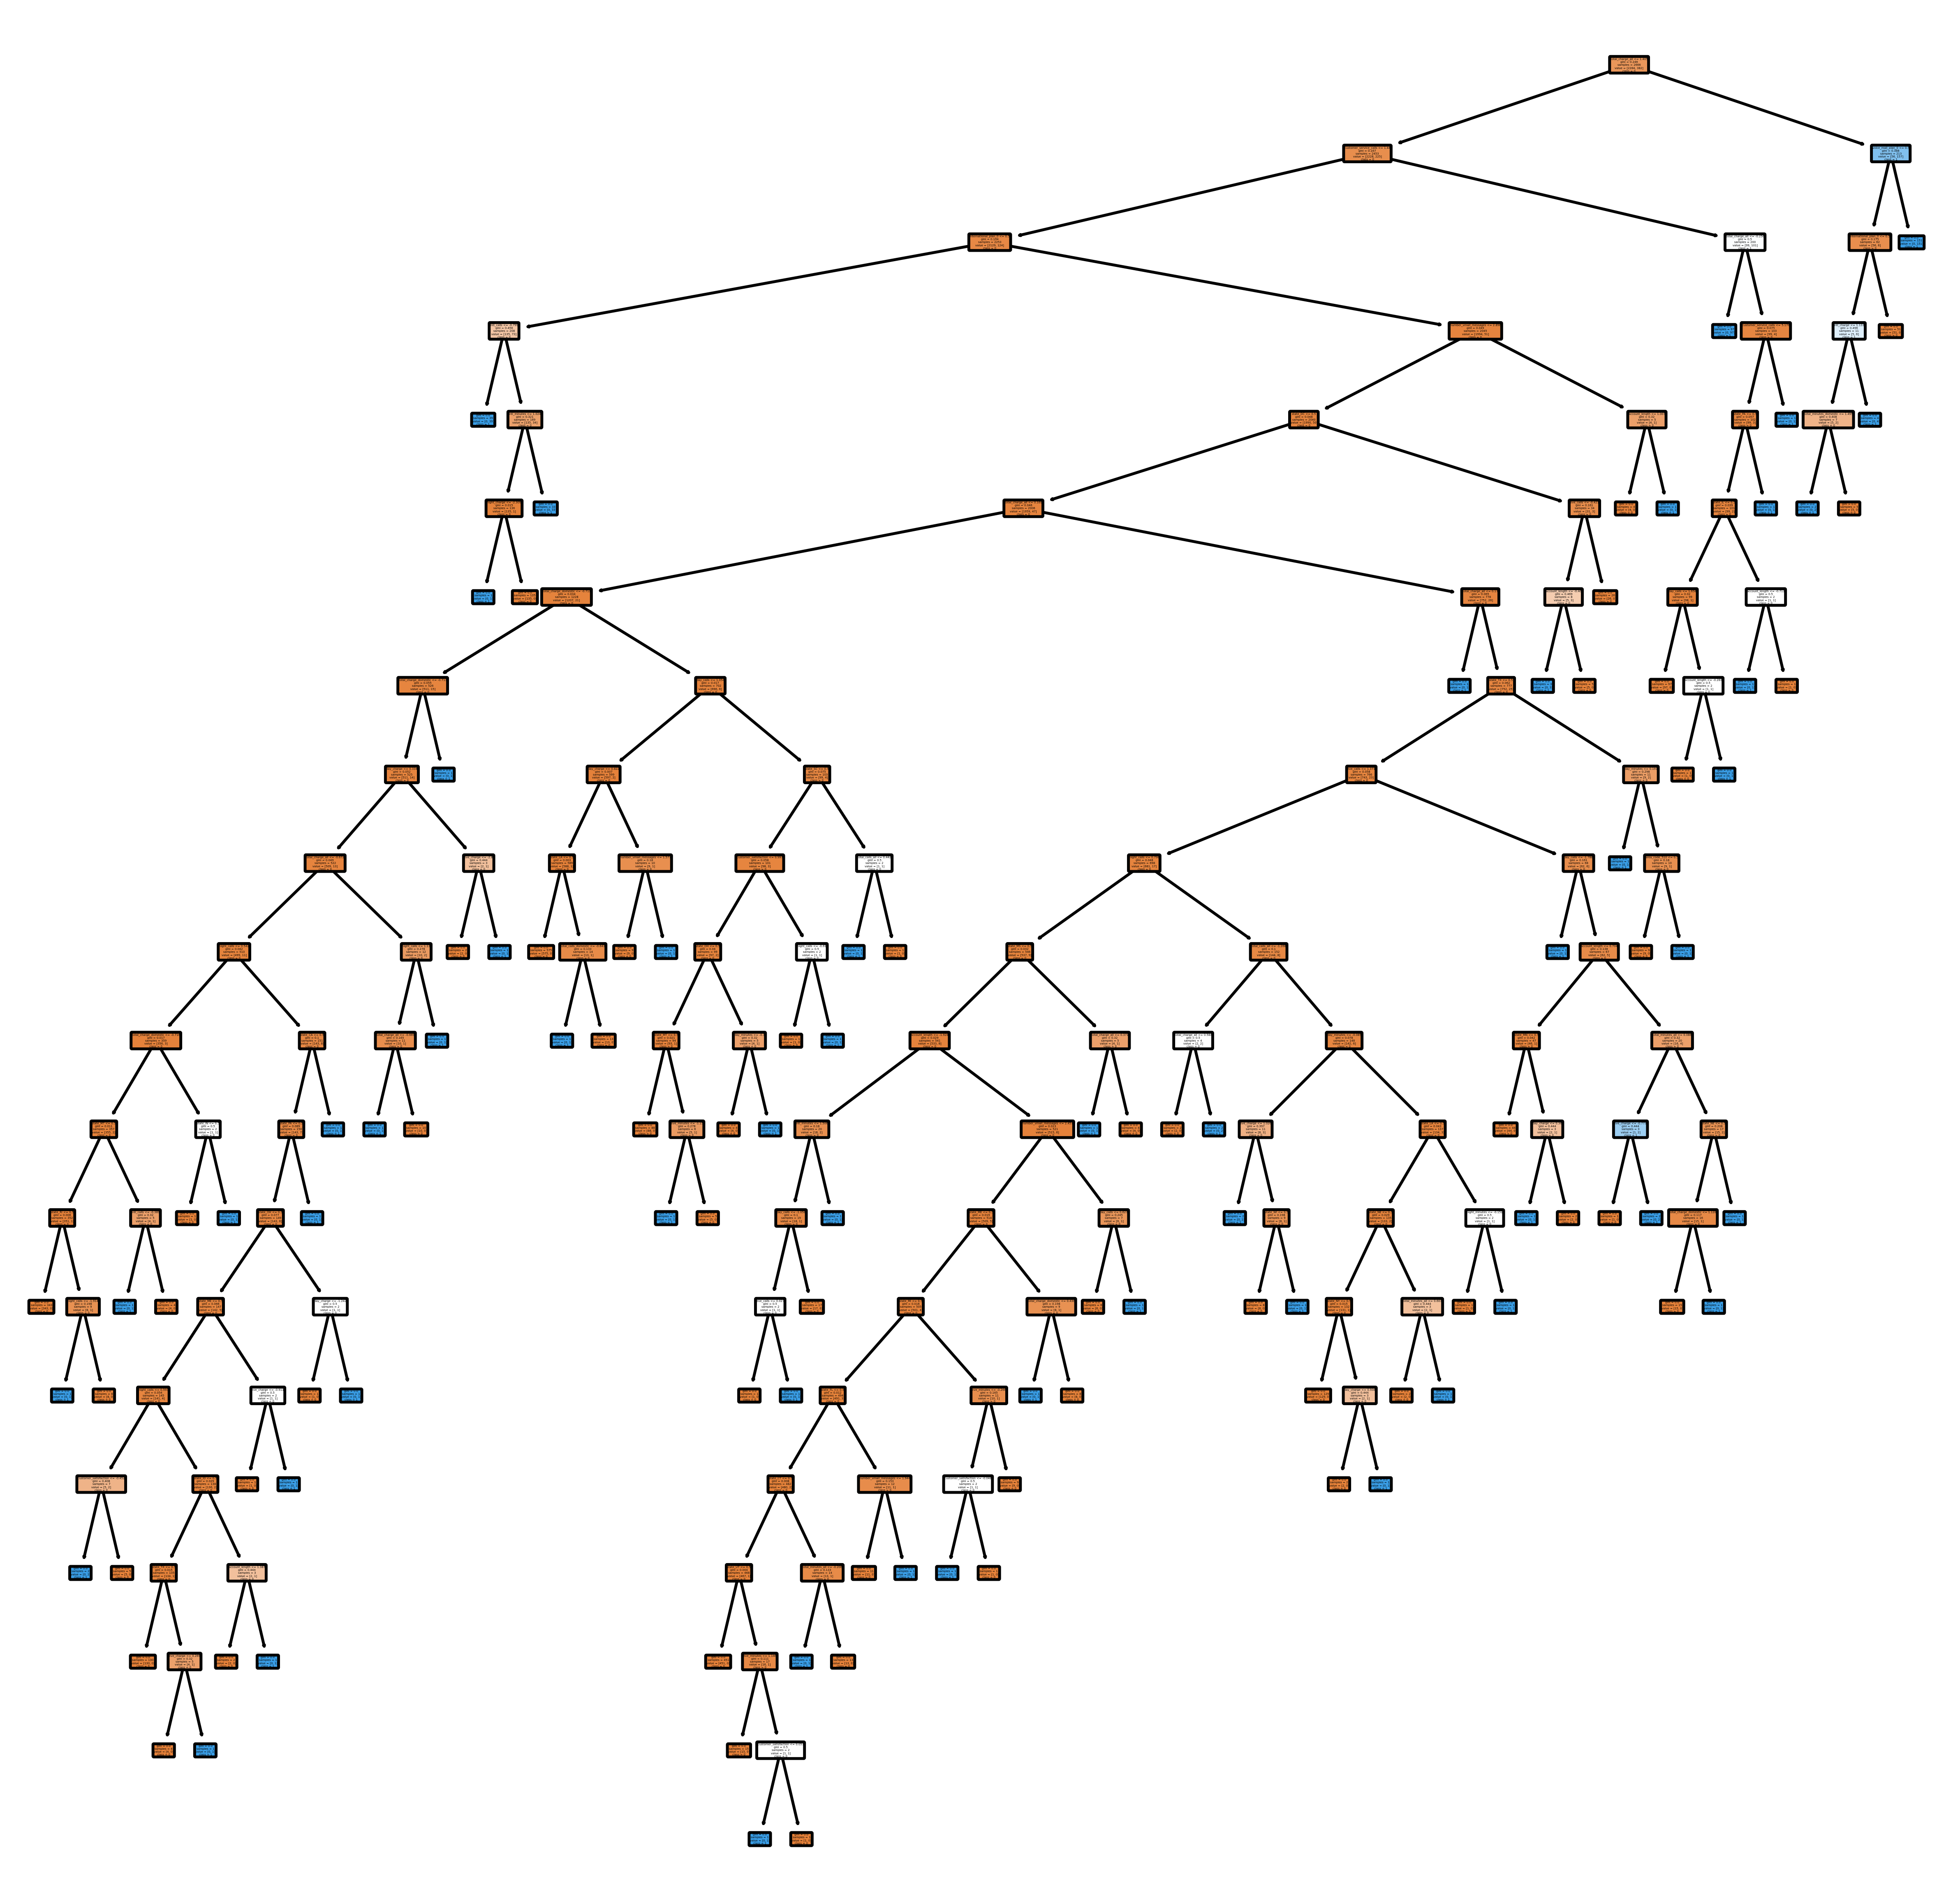

In [116]:
DTmodel = DecisionTreeClassifier(random_state=420)
DTmodel.fit(X_train_scaled, y_train)

plt.figure(figsize=(12,12), dpi=500, edgecolor='grey')

tree.plot_tree(DTmodel,
               feature_names= X_train_scaled.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)

plt.savefig("Images/DTmodel") # Save a copy of the chart to the images folder

plt.show()

------------------

# Model 4: Random Forest with SMOTE

Random forest combines the output of multiple decision trees to reach a single result. 
* While decision trees are common supervised learning algorithms, they can be prone to problems, such as bias and overfitting. 
* However, when multiple decision trees form an ensemble in the random forest algorithm, they **predict more accurate results**, particularly when the individual trees are uncorrelated with each other.

Key Benefits:
* Reduced risk of overfitting
* Provides flexibility
* Easy to determine feature importance

Key Challenges:
* Time-consuming process
* Requires more resources
* More complex

## Implementing Random Forest Model

**Prepare and Fit the Data**

In [117]:
# prepare the model
# create a pipeline with preprocessing, smote, and DecisionTreeClassifier
RFmodel = imbpipeline(steps=[
    ('smote', SMOTE()),
    ('model', RandomForestClassifier()),
])

#fit the model on training data
RFmodel.fit(X_train_scaled, y_train)

Pipeline(steps=[('smote', SMOTE()), ('model', RandomForestClassifier())])

**Training Dataset**

Model Performance for Train Set
Accuracy: 1.0
Precision:1.0
Recall:   1.0
F1-Score: 1.0


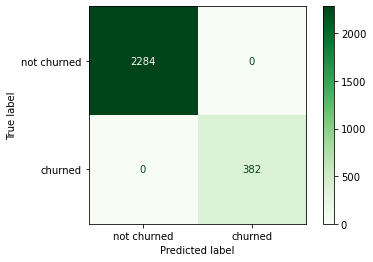

In [118]:
#evaluate the performance of the model for the train set
model_metrics_train(RFmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.969
Precision:0.944
Recall:   0.842
F1-Score: 0.89


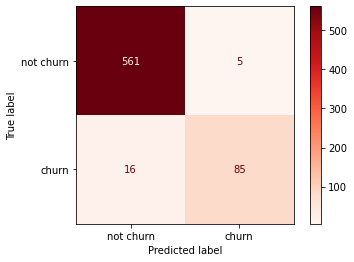

In [119]:
#evaluate the performance of the model for the test set
model_metrics_test(RFmodel)

## Evaluating Random Forest Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are very close
* `Accuracy of the Test model:`  Higher than any other model
* `Precision of the Test model:` Higher than any other model
* `Recall of the Test model:   ` Lower than Decision Tree model
* `F1-Score of the Test model: ` Higher than any other model

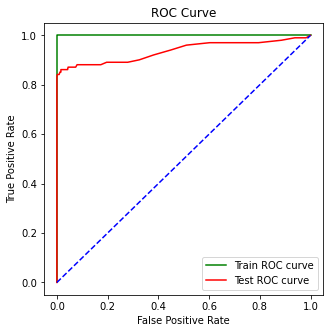

In [120]:
ROC_Curve_PP (RFmodel, X_train_scaled, X_test_scaled, y_train, y_test)

------------------

# Model 5: Gradient Boosting with SMOTE

Gradient boosting gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.
* When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees
* Gradient boosting relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. 
* It usually outperforms random forest
* A gradient-boosted trees model is built in a stage-wise fashion as in other boosting methods, but it generalizes the other methods by allowing optimization of an arbitrary differentiable loss function

## Implementing Gradient Boosting Model

**Prepare and Fit the Data**

In [121]:
# prepare the model
# create a pipeline with smote, and GradientBoost
GBmodel = imbpipeline(steps=[
    ('smote', SMOTE()),
    ('model', GradientBoostingClassifier()),
])

# fit the training data
GBmodel.fit(X_train_scaled, y_train)

Pipeline(steps=[('smote', SMOTE()), ('model', GradientBoostingClassifier())])

**Training Dataset**

Model Performance for Train Set
Accuracy: 0.98
Precision:1.0
Recall:   0.864
F1-Score: 0.927


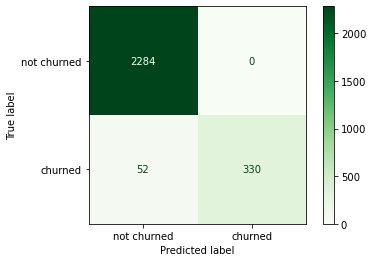

In [122]:
#Evaluate the performance of the model
model_metrics_train (GBmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.981
Precision:1.0
Recall:   0.871
F1-Score: 0.931


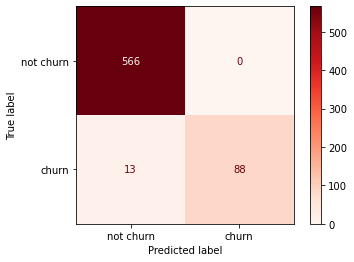

In [123]:
#Evaluate the performance of the model
model_metrics_test (GBmodel)

## Evaluating Gradient Boosting Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are very close
* `Accuracy of the Test model:`  Higher than any other model
* `Precision of the Test model:` Higher than any other model
* `Recall of the Test model:   ` Same as Decision Tree model
* `F1-Score of the Test model: ` Higher than any other model

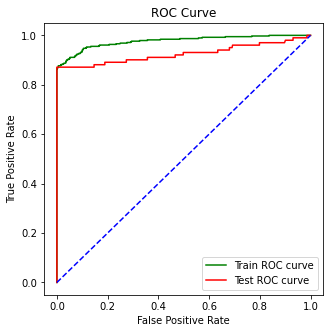

In [124]:
ROC_Curve_DF (GBmodel, X_train_scaled, X_test_scaled, y_train, y_test)

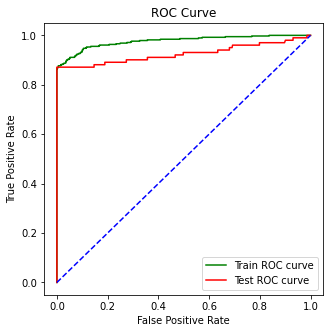

In [125]:
ROC_Curve_PP (GBmodel, X_train_scaled, X_test_scaled, y_train, y_test)

------------------

# Model 6: AdaBoost without SMOTE

AdaBoost works by combining multiple "weak classifiers" into a single "strong classifier," where weak classifiers are better than random classification and the strong classifier incorporates the output of all weak classifiers. 
* Each weak learner is assigned a weight based on its accuracy. The more accurate a weak learner, the higher the weight assigned to it.
* This method operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.
* Adaptive boosting or AdaBoost

## Implementing AdaBoost Model

In [126]:
# prepare the model
# create a pipeline with preprocessing, smote, and AdaBoost
AdaBmodel = AdaBoostClassifier(n_estimators=40,random_state=42)

# fit the training data
AdaBmodel.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=40, random_state=42)

**Training Dataset**

Model Performance for Train Set
Accuracy: 0.926
Precision:0.819
Recall:   0.618
F1-Score: 0.704


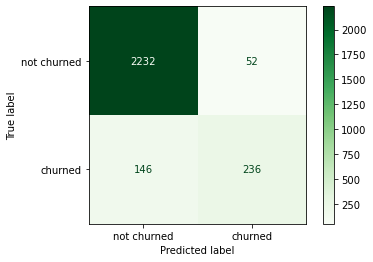

In [127]:
#Evaluate the performance of the model
model_metrics_train (AdaBmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.921
Precision:0.816
Recall:   0.614
F1-Score: 0.701


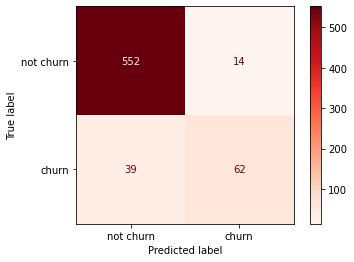

In [128]:
#Evaluate the performance of the model
model_metrics_test (AdaBmodel)

## Evaluating AdaBoost Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are very close
* `Accuracy of the Test model:`  Lower than the best model
* `Precision of the Test model:` Lower than the best model
* `Recall of the Test model:   ` Lower than the best model
* `F1-Score of the Test model: ` Lower than the best model

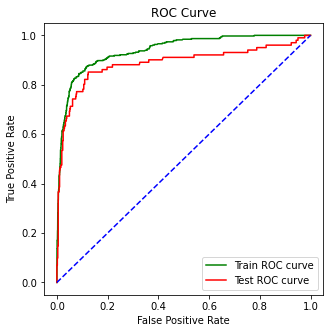

In [129]:
ROC_Curve_PP (AdaBmodel, X_train_scaled, X_test_scaled, y_train, y_test)

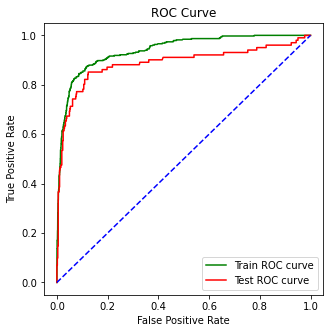

In [130]:
ROC_Curve_DF (AdaBmodel, X_train_scaled, X_test_scaled, y_train, y_test)

**Factors that Drive the model**

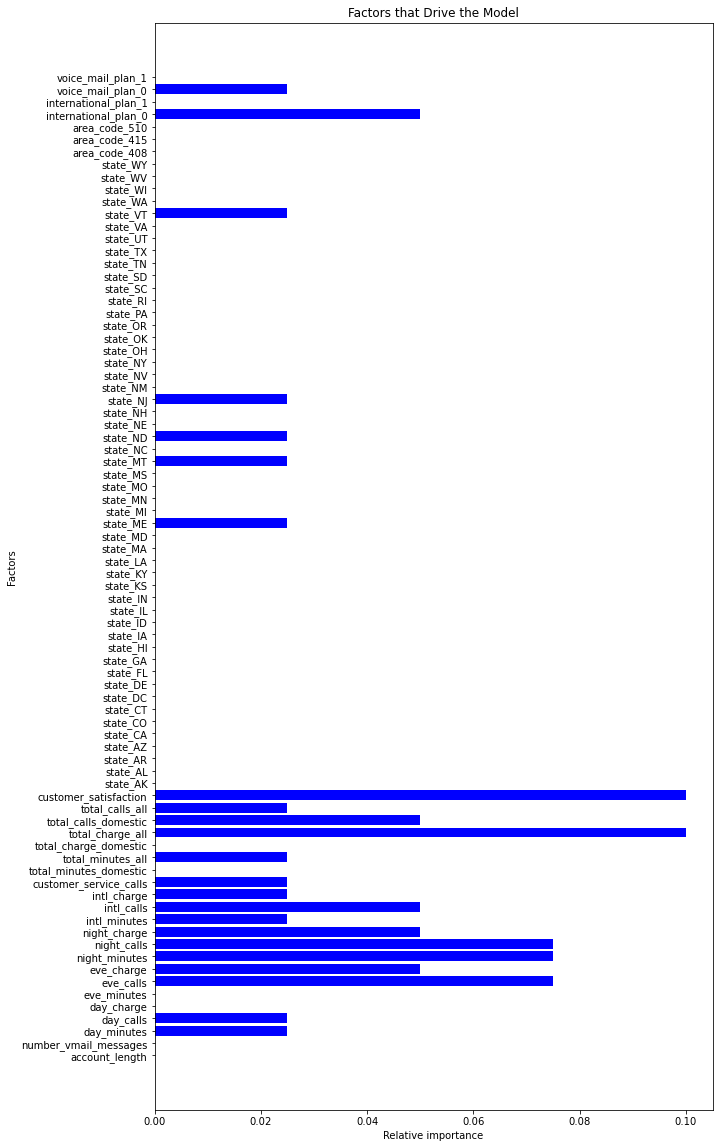

In [131]:
Feature_Importance(AdaBmodel)

In the above graph, we can see that **the most important favtors to churn** is the international plan, the total charges, the total charge for domestic calls, the customer service calls, the minutes of calls during the day, and the total charges during the day

------------------

# Model 7: XGBoost without SMOTE

XGBoost is an implementation of gradient boosting that’s designed for computational speed and scale. XGBoost leverages multiple cores on the CPU, allowing for learning to occur in parallel during training.  

## Implementing XGBoost Model

**Prepare and Fit the Data**

In [132]:
# prepare the data
XGBmodel = xgb.XGBClassifier(random_state=42, objective='binary:logistic', alpha=2)

# fit the training data
XGBmodel.fit(X_train_scaled, y_train)

XGBClassifier(alpha=2, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=2, ...)

**Training Dataset**

Model Performance for Train Set
Accuracy: 0.99
Precision:1.0
Recall:   0.929
F1-Score: 0.963


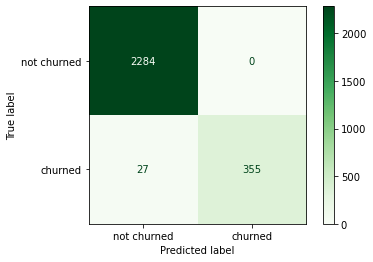

In [133]:
#Evaluate the performance of the model
model_metrics_train (XGBmodel)

**Testing Dataset**

Model Performance for Test Set
Accuracy: 0.981
Precision:1.0
Recall:   0.871
F1-Score: 0.931


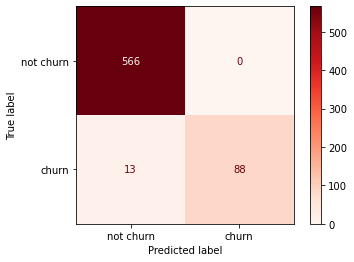

In [134]:
#Evaluate the performance of the model
model_metrics_test (XGBmodel)

## Evaluating XGBoost Model Performance

**Evaluating the Model Performance:**
* `Results of the Train model vs. the Test model:` The resuls are very close
* `Accuracy of the Test model:`  Same as Gradient Boosting Model
* `Precision of the Test model:` Same as Gradient Boosting Model
* `Recall of the Test model:   ` Same as Gradient Boosting Model
* `F1-Score of the Test model: ` Same as Gradient Boosting Model

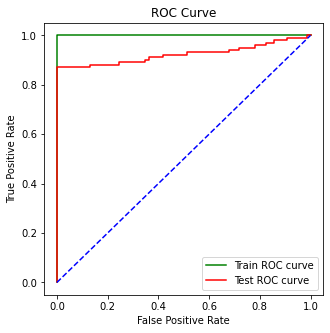

In [135]:
ROC_Curve_PP (XGBmodel, X_train_scaled, X_test_scaled, y_train, y_test)

**Factors that Drive the model**

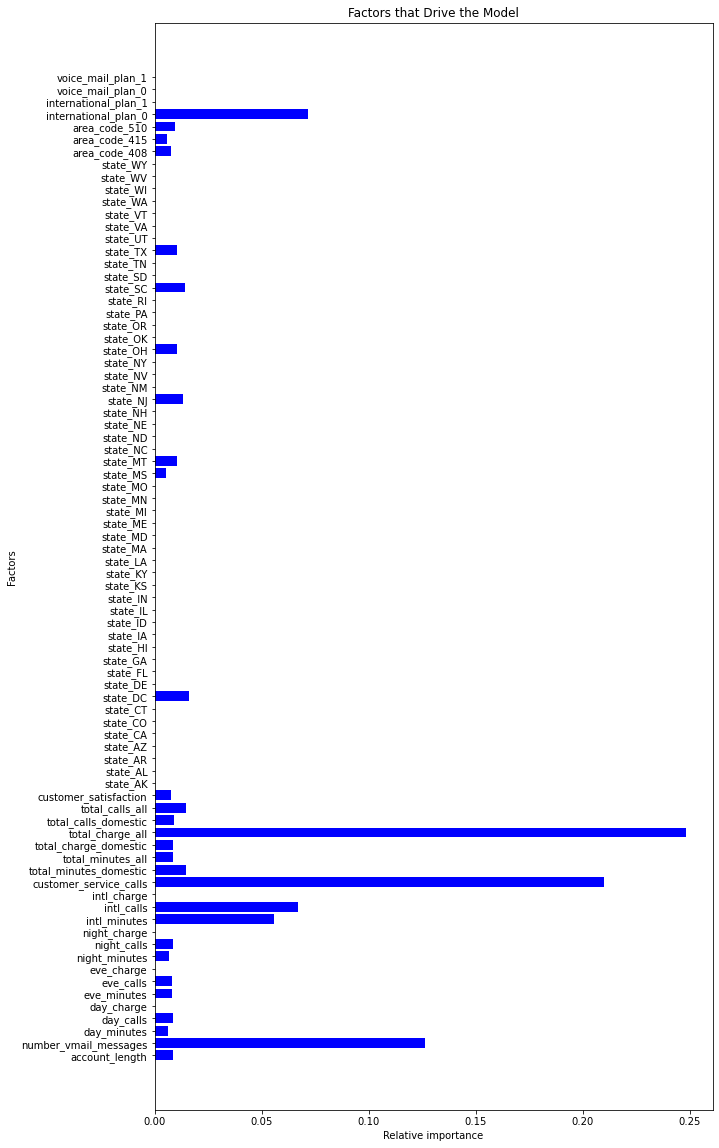

In [136]:
Feature_Importance(XGBmodel)

------------------

# Conclusion and Recommendations

## Best Performing Model

**Gradient Boost with SMOTE** and **XGBoost** are the best performing models that generate same results. 
* The accuracy of both models is 98.1% which means that we can trust the results. 
* The Precision rate of both models is 100% and the F1-Score 93.1%. 
* Most importantly, the Racall is 87.1% which means that **our models can accuretly predict 87.1% of the times which customer is going to churn**

## Conclusion

According to our analysis, the most important factors that **drive the decision** of a Syriatel Mobile customer **to churn** are the below:

* `International Plan:` 42% of the customers that have international plan churned  
* `Total charges: `: Customers with high charges are more likely to churn
* `Customer Service Calls:` Customers that call the customer service line frequently (especially 4 times and more), have higher probabilities to churn

## Recommendations

According to the above conclusions, we offer the below **recommendations**:

* `1:` Syriatel should introduce a **new program for customers with high usage**. This new program can include **unlimeted calls for a monthly fee, similar to the competition.**
* `2:` Syriatel should introducce a **new international plan that is more competitive**. Should analyse the prices that the competition offer for International plans and provide a similar plan
* `3:` Syriatel should pay attention to the number of customer service calls that each customer makes. **Customers that call frequently the customer service line should be offered promotions or other programs to keep them with Syriatel**

------------------

**Notes**